<a href="https://colab.research.google.com/github/HimanshiBaliyan/SER/blob/main/SerV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopy
!pip install --upgrade librosa
!pip install soundfile

In [ ]:
import os
import sys

import pandas as pd
import numpy as np

import librosa
import librosa.display
from ipywidgets import interact

from matplotlib import pyplot as plt
import seaborn as sns

import random
import soundfile as sf

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import time
#to ignore warnings
#The code sets up configurations to ignore certain warnings, specifically DeprecationWarning, to prevent them from cluttering the output.
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
print ("Done")

Done


In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Ravdess = "/content/drive/MyDrive/Ravdess/"
Tess = "/content/drive/MyDrive/Tess/"
Crema = "/content/drive/MyDrive/Crema/"
Savee = "/content/drive/MyDrive/Savee/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    if dir.startswith('.'): # Check if the item is a hidden file/directory
        continue

    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()
Ravdess_df.count()

Emotions    1440
Path        1440
dtype: int64

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
Crema_df.count()

Emotions    7490
Path        7490
dtype: int64

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    if dir.startswith('.'): # Check if the item is a hidden file/directory
        continue

    directories = os.listdir(Tess + dir)

    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[0]
        if part==['ps']:
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
Tess_df.count()

Emotions    16
Path        16
dtype: int64

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[0]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.count()

Emotions    480
Path        480
dtype: int64

In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()
print(data_path.size)

18852


In [ ]:
data_path.head()

In [ ]:
data_path.count()

In [ ]:
sorted_df = data_path.sort_values(by=['Emotions'], ascending=True)
sorted_df.head()

,Emotions,Path
0,,/content/drive/MyDrive/Tess/TESS Toronto emoti...
3,OAF,/content/drive/MyDrive/Tess/TESS Toronto emoti...
4,OAF,/content/drive/MyDrive/Tess/TESS Toronto emoti...
7,OAF,/content/drive/MyDrive/Tess/TESS Toronto emoti...
9,OAF,/content/drive/MyDrive/Tess/TESS Toronto emoti...


In [ ]:
sorted_df[sorted_df['Emotions'] == 'surprise']['Path'].iloc[0]

'/content/drive/MyDrive/Savee/su11.wav'

In [ ]:
sorted_df.to_csv('emotion.csv', mode='a', index=False, header=False)

In [ ]:
data_df = pd.read_csv(r"/content/drive/MyDrive/SerDataset/csvData/emotion_loc.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SerDataset/csvData/emotion_loc.csv'

Data Visualization and Exploration

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 2 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Unnamed: 0                                                                    9425 non-null   object
 1   /content/drive/MyDrive/Tess/TESS Toronto emotional speech set data/.DS_Store  9425 non-null   object
dtypes: object(2)
memory usage: 147.4+ KB


In [ ]:
data_df.nunique()

Unnamed: 0                                                                        11
/content/drive/MyDrive/Tess/TESS Toronto emotional speech set data/.DS_Store    9425
dtype: int64

In [ ]:
print(data_df.Emotion.value_counts())

AttributeError: 'DataFrame' object has no attribute 'Emotion'

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
# waveplot-----------------------------------------------------
def plot_waveplot(title,y,sr):
    librosa.display.waveshow(y=y, sr=sr)
    # Add axis labels
    plt.title(title)
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')


# Spectrogram---------------------------------------------------
def plot_spectrogram(title,y,sr):
    # compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
    colorbar = plt.colorbar(format='%+2.0f')
    colorbar.set_label('Intensity(DB)')
    # Add axis labels
    plt.title(title)
    plt.xlabel('Time(sec)')
    plt.ylabel('Frequency(Hz)')


# Mel-spectrogram------------------------------------------------
def plot_melspectrogram(title,y,sr):
    # compute the Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    # Display the Mel spectrogram
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    colorbar = plt.colorbar(format='%+2.0f')
    colorbar.set_label('Intensity(DB)')
    # Add axis labels
    plt.title(title)
    plt.xlabel('Time(sec)')
    plt.ylabel('Frequency(Mel)')


In [ ]:


data_angry,sr1 = librosa.load(sorted_df[sorted_df['Emotions'] == 'angry']['Path'].iloc[0])
data_fear,sr2 =  librosa.load(sorted_df[sorted_df['Emotions'] == 'fear']['Path'].iloc[0])
data_surprise,sr3 = librosa.load(sorted_df[sorted_df['Emotions'] == 'surprise']['Path'].iloc[0])
data_disgust,sr4 =  librosa.load(sorted_df[sorted_df['Emotions'] == 'disgust']['Path'].iloc[0])
data_neutral,sr5 =  librosa.load(sorted_df[sorted_df['Emotions'] == 'neutral']['Path'].iloc[0])
data_sad,sr6 =  librosa.load(sorted_df[sorted_df['Emotions'] == 'sad']['Path'].iloc[0])
data_calm,sr7 =  librosa.load(sorted_df[sorted_df['Emotions'] == 'calm']['Path'].iloc[0])

* For the ***waveplot***, we calculate the *Root Mean Square* (RMS) value of the audio signal, which represents the average power.
* For the ***spectrogram***, we calculate the *Zero-Crossing Rate*, which represents the rate at which the audio signal changes its sign and can provide insights into the level of "noisiness" or abrupt changes in the signal.
* For the ***mel-spectrogram***, we calculate the mean of *MFCCs*, which captures information about the spectral envelope of the audio signal and can be relevant for distinguishing between different emotions.

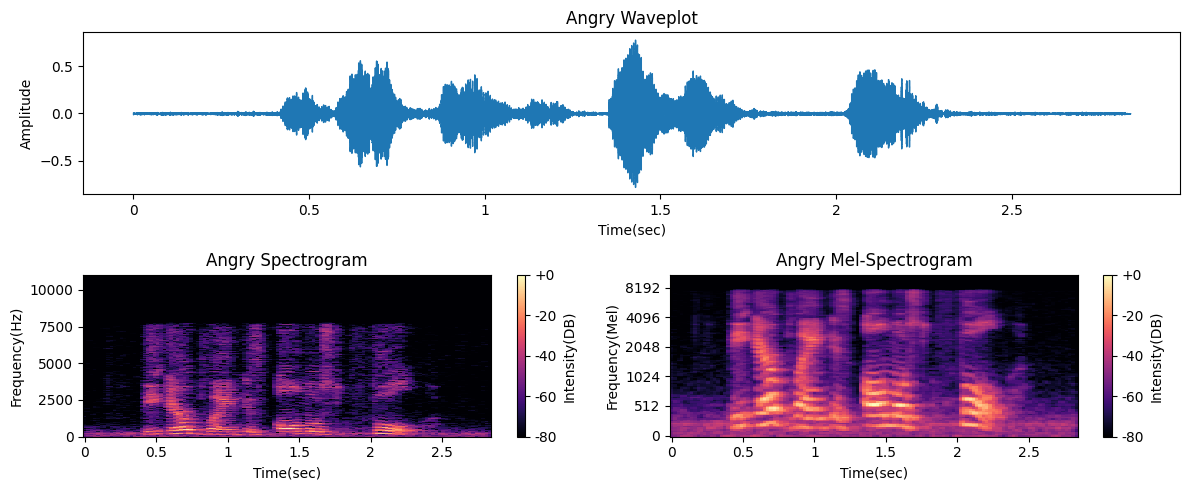

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Angry Waveplot'
plot_waveplot(title,data_angry, sr1)

plt.subplot(2,2,3)
title = 'Angry Spectrogram'
plot_spectrogram(title,data_angry,sr1)

plt.subplot(2,2,4)
title = 'Angry Mel-Spectrogram'
plot_melspectrogram(title,data_angry, sr1)

plt.tight_layout()
plt.show()

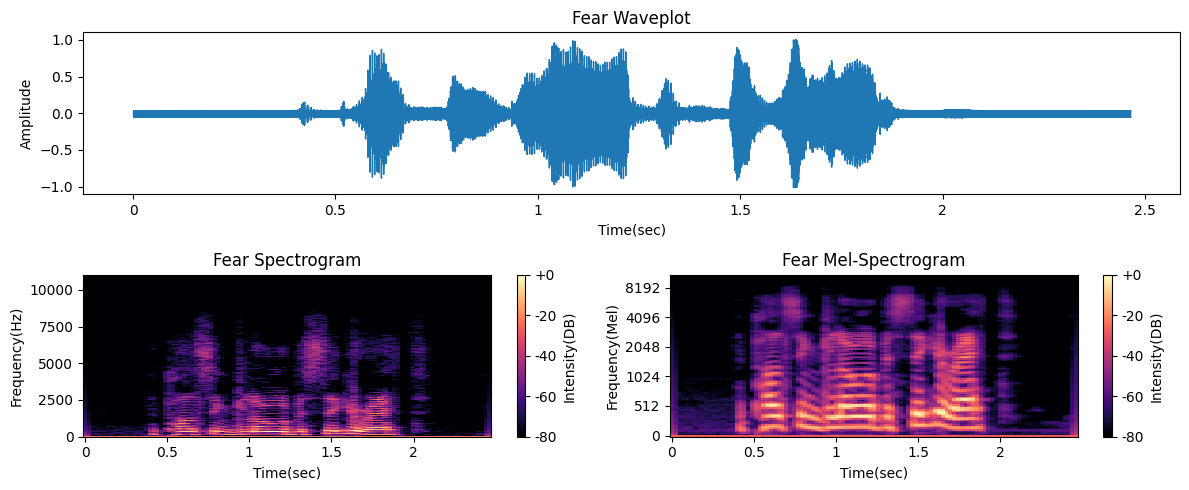

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Fear Waveplot'
plot_waveplot(title,data_fear, sr2)

plt.subplot(2,2,3)
title = 'Fear Spectrogram'
plot_spectrogram(title,data_fear,sr2)

plt.subplot(2,2,4)
title = 'Fear Mel-Spectrogram'
plot_melspectrogram(title,data_fear, sr2)

plt.tight_layout()
plt.show()

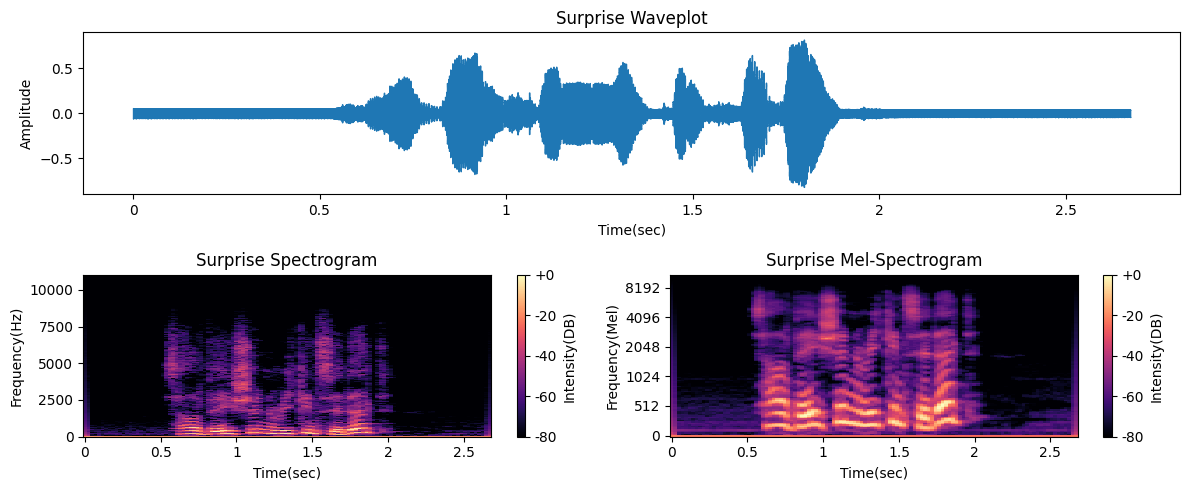

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Surprise Waveplot'
plot_waveplot(title,data_surprise, sr3)

plt.subplot(2,2,3)
title = 'Surprise Spectrogram'
plot_spectrogram(title,data_surprise,sr3)

plt.subplot(2,2,4)
title = 'Surprise Mel-Spectrogram'
plot_melspectrogram(title,data_surprise, sr3)

plt.tight_layout()
plt.show()

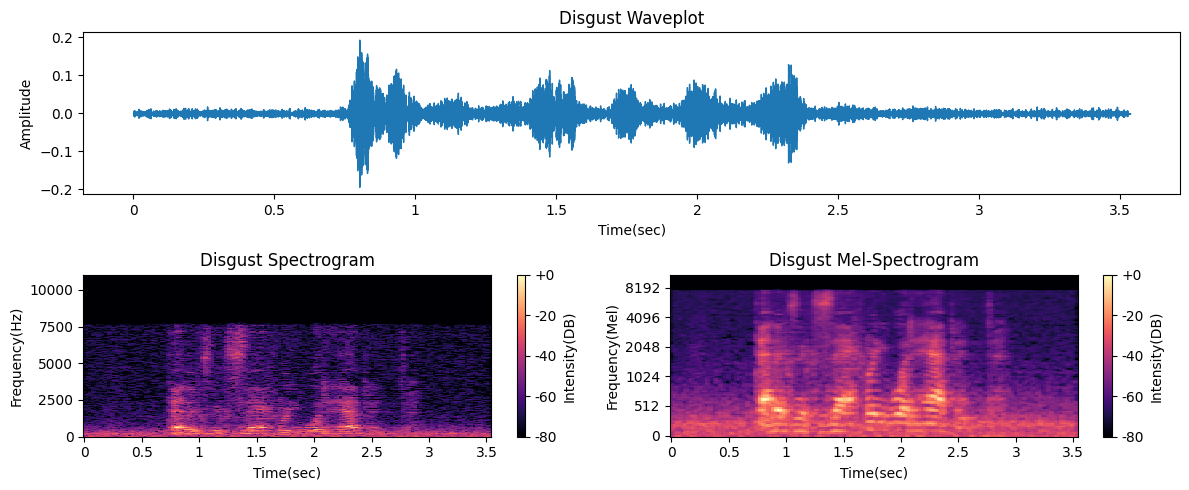

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Disgust Waveplot'
plot_waveplot(title,data_disgust, sr4)

plt.subplot(2,2,3)
title = 'Disgust Spectrogram'
plot_spectrogram(title,data_disgust,sr4)

plt.subplot(2,2,4)
title = 'Disgust Mel-Spectrogram'
plot_melspectrogram(title,data_disgust, sr4)

plt.tight_layout()
plt.show()

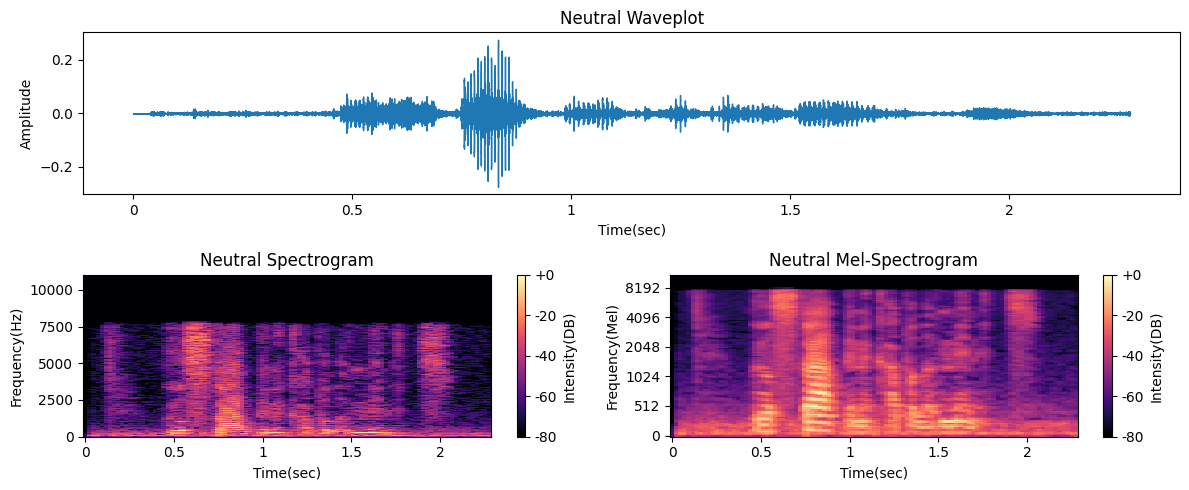

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Neutral Waveplot'
plot_waveplot(title,data_neutral, sr5)

plt.subplot(2,2,3)
title = 'Neutral Spectrogram'
plot_spectrogram(title,data_neutral,sr5)

plt.subplot(2,2,4)
title = 'Neutral Mel-Spectrogram'
plot_melspectrogram(title,data_neutral, sr5)

plt.tight_layout()
plt.show()

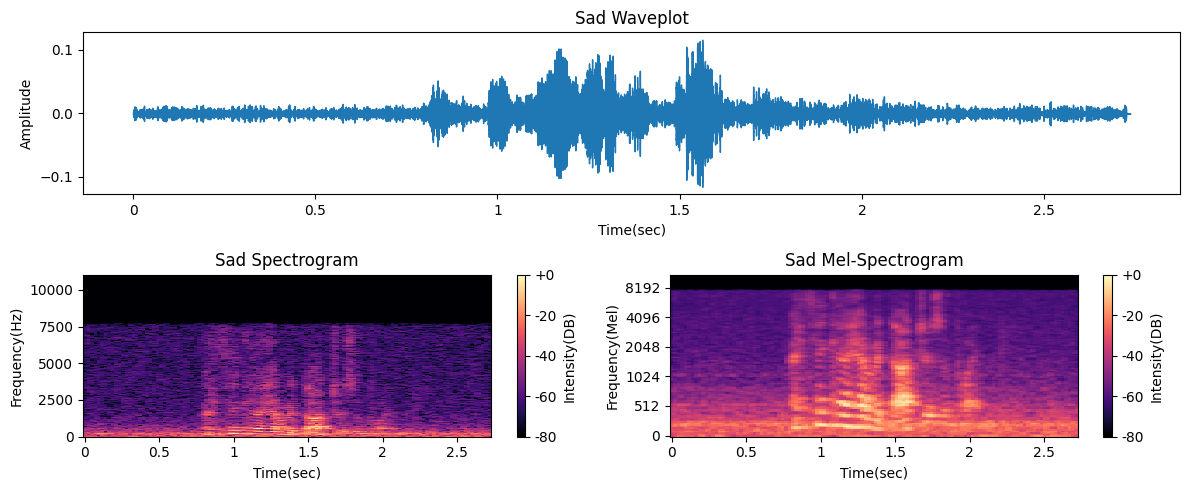

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Sad Waveplot'
plot_waveplot(title,data_sad, sr6)

plt.subplot(2,2,3)
title = 'Sad Spectrogram'
plot_spectrogram(title,data_sad,sr6)

plt.subplot(2,2,4)
title = 'Sad Mel-Spectrogram'
plot_melspectrogram(title,data_sad, sr6)

plt.tight_layout()
plt.show()

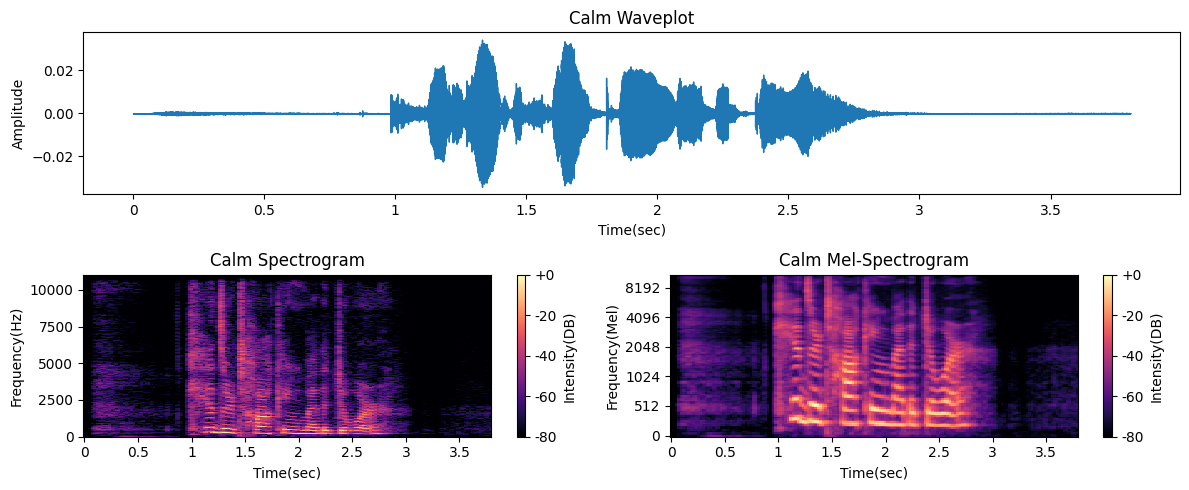

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(2,1,1)
title = 'Calm Waveplot'
plot_waveplot(title,data_calm, sr7)

plt.subplot(2,2,3)
title = 'Calm Spectrogram'
plot_spectrogram(title,data_calm,sr7)

plt.subplot(2,2,4)
title = 'Calm Mel-Spectrogram'
plot_melspectrogram(title,data_calm, sr7)

plt.tight_layout()
plt.show()

In [ ]:
# Function to load audio data
def load_audio(path):
    y, sr = librosa.load(path, sr=None)
    return y, sr

# Function to calculate MFCCs
def calculate_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Using 13 MFCC coefficients
    return mfccs

# Function to plot waveplot, spectrogram, and mel-spectrogram
def plot_audio_features(emotion):
    # Get the path for the selected emotion
    path = data_df[data_df['Emotion'] == emotion]['Path'].iloc[0]

    # Load the audio data
    y, sr = load_audio(path)

    plt.figure(figsize=(11, 11))

    # Display Audio
    display(Audio(path))

    # Plot waveplot
    plt.subplot(3, 1, 1)
    title = f'{emotion.capitalize()} Waveplot\nRMS: {np.sqrt(np.mean(y**2)):.2f}'  # RMS value
    plot_waveplot(title, y, sr)

    # Plot spectrogram
    plt.subplot(3, 2, 3)
    title = f'{emotion.capitalize()} Spectrogram\nZero-Crossing Rate: {np.mean(librosa.zero_crossings(y)):.2f}'  # Zero-Crossing Rate
    plot_spectrogram(title, y, sr)

    # Plot mel-spectrogram
    plt.subplot(3, 2, 4)
    mfcc_mean = np.mean(calculate_mfcc(y, sr))
    title = f'{emotion.capitalize()} Mel-Spectrogram\nMFCC Mean: {mfcc_mean:.2f}'  # Mean of MFCCs
    plot_melspectrogram(title, y, sr)

    plt.tight_layout()
    plt.show()

# Interactive selection of emotion
interact(plot_audio_features, emotion=data_df['Emotion'].unique())



In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate = rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sr, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr= sr, n_steps=pitch_factor)

In [ ]:
augment_folder_path = '/content/drive/My Drive/SerDataset/AugmentData/'

num_rows = 50

# Randomly select num_rows for each augmentation function
random_rows = {}
for augment_function in ['noise', 'stretch', 'shift', 'pitch']:
    random_rows[augment_function] = data_df.sample(n=num_rows)


# Function to apply augmentations and save augmented files
def apply_augmentations(row):

    data, sr = librosa.load(row['Path'])

    augmented_files = []
    for augment_function in [noise, stretch, shift, pitch]:

        if augment_function == pitch:
          augmented_data = augment_function(data,sr)
        else:
          augmented_data = augment_function(data)


        # Save augmented audio to the specified folder
        file_name = os.path.basename(row['Path'])
        augmented_file_path = os.path.join(augment_folder_path, f'{file_name}_augmented_{augment_function.__name__}.wav')
        sf.write(augmented_file_path, augmented_data, sr)
        augmented_files.append(augmented_file_path)
    return pd.Series(augmented_files)


# Apply augmentations and save augmented files for randomly selected rows
augmented_rows = []
for index, row in random_rows.items():
    for _, inner_row in row.iterrows():
        augmented_files = apply_augmentations(inner_row)
        augmented_rows.extend([{'Emotion': inner_row['Emotion'], 'Path': path, 'Lat': inner_row['Lat'], 'Long': inner_row['Long']} for path in augmented_files])



augmented_df = pd.DataFrame(augmented_rows)
print(augmented_df)
result_df = pd.concat([data_df, augmented_df], ignore_index=True)

print(result_df)


In [ ]:
# print(augmented_df)
# interact(plot_audio_features, emotion=augmented_df['Emotion'].unique())

Feature Extraction

In [ ]:
def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch,sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)


In [ ]:
print(len(X))
print(len(Y))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
print(Features.labels.value_counts())
Features.head()
print(Features.shape)

Data Preparation For Modelling

In [ ]:
columns = ['model', 'accuracy', 'f1-score', 'precision', 'recall', 'training_time']
result = pd.DataFrame(columns=columns)

# Function to fill values after each model training
def update_result(model_name, accuracy, f1_score, precision, recall, training_time):
    global result
    new_row = pd.DataFrame({'model': [model_name], 'accuracy': [accuracy], 'f1-score': [f1_score], 'precision': [precision], 'recall': [recall], 'training_time': [training_time]})
    result = pd.concat([result, new_row], ignore_index=True)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

In [ ]:
start_time = time.time()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

In [ ]:
with open('modelCNN.pkl', 'wb') as f:
  pickle.dump(model,f)

In [ ]:
end_time = time.time()
training_time = end_time - start_time
print("Training time : ",training_time," seconds")

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(len(history.history['accuracy']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(100)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

print(report)

# Fetch metrics from the classification report
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Update the DataFrame with the metrics for the model
update_result('CNN', accuracy, f1_score, precision, recall,training_time)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Assuming x_train and x_test are your training and testing data, and y_train and y_test are your labels

# Create a Sequential model
model1 = Sequential()

# Add a SimpleRNN layer with 64 units (you can adjust this number based on your specific task)
model1.add(SimpleRNN(64, input_shape=(x_train.shape[1], 1)))

# Add a Dense layer with 7 units (for 7 categories) and softmax activation function
model1.add(Dense(8, activation='softmax'))

# Compile the model with appropriate optimizer, loss, and metric
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(filepath='RNN.h5', save_best_only=True)
]

# Print a summary of the model architecture
model1.summary()
start_time = time.time()
# Train the model
model1.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),callbacks=callbacks)

In [ ]:
end_time = time.time()
training_time = end_time - start_time
print("Training time : ",training_time," seconds")

In [ ]:
with open('modelRNN.pkl', 'wb') as f:
  pickle.dump(model1,f)

In [ ]:
print("Accuracy of our model on test data : " , model1.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(len(history.history['accuracy']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model1.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [ ]:
df_RNN = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_RNN['Predicted Labels'] = y_pred.flatten()
df_RNN['Actual Labels'] = y_test.flatten()

df_RNN.head(100)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

print(report)

# Fetch metrics from the classification report
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Update the DataFrame with the metrics for the model
update_result('RNN', accuracy, f1_score, precision, recall,training_time)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model2 = Sequential()

model2.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model2.add(LSTM(256, return_sequences=True))
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(64, return_sequences=True))

model2.add(Flatten())
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(units=8, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

start_time = time.time()

rl = ReduceLROnPlateau(monitor='loss', factor=0.4, patience=2, min_lr=0.0000001)
history = model2.fit(x_train, y_train, batch_size=64, epochs=90, validation_data=(x_test, y_test), callbacks=[rl])


In [ ]:
end_time = time.time()
training_time = end_time - start_time
print("Training time : ",training_time," seconds")

In [ ]:
with open('modelLSTM.pkl', 'wb') as f:
  pickle.dump(model2,f)

In [ ]:
print("Accuracy of our model on test data : " , model2.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(len(history.history['accuracy']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model2.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [ ]:
df_LSTM = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_LSTM['Predicted Labels'] = y_pred.flatten()
df_LSTM['Actual Labels'] = y_test.flatten()

df_LSTM.head(100)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

print(report)

# Fetch metrics from the classification report
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Update the DataFrame with the metrics for the model
update_result('LSTM', accuracy, f1_score, precision, recall,training_time)

In [ ]:
print("\n\nComparision of Different Model Result\n\n")
print(result)

In [ ]:
result.to_csv('result.csv', index=False)